Packages

In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

Mining data from indeed for data scientist jobs across canada using beautiful soup

In [2]:
title = []
loc = []
company = []
id = []
for i in range(0,1000,10):
    URL = "https://ca.indeed.com/jobs?q=data+scientist&l=Canada&start="+str(i)
    page = requests.get(URL)
    soup = bs(page.text,"html.parser")
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for span in div.find_all(name="span", attrs={"class":"company"}):
            company_tmp = span.text
        for span in div.find_all(name={"span","div"}, attrs={"class":"location"}):
            loc_tmp = span.text
        for x in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            title_tmp = x["title"]
        conc = title_tmp + "-" + company_tmp + "-" + loc_tmp
        if conc not in id:
            id.append(conc)
            company.append(company_tmp)
            loc.append(loc_tmp)
            title.append(title_tmp)

Put information into a data frame

In [3]:
data = {"id":id,"job":title,"location":loc,"company":company}
df = pd.DataFrame(data)

In [5]:
df

,id,job,location,company
0,Senior Data Scientist-\nREIN Technologies Inc....,Senior Data Scientist,"Halifax, NS",\nREIN Technologies Inc.
1,Senior Data Scientist-\nNeurio Technology Inc-...,Senior Data Scientist,"Vancouver, BC",\nNeurio Technology Inc
2,Educational Data Scientist-\n\nProdigy Game-Bu...,Educational Data Scientist,"Burlington, ON",\n\nProdigy Game
3,Senior Data Scientist - IoT-\n\nSamsung Electr...,Senior Data Scientist - IoT,"Vancouver, BC",\n\nSamsung Electronics
4,Data Scientist Co-op 2019 - KW-\n\nCapital One...,Data Scientist Co-op 2019 - KW,"Kitchener, ON",\n\nCapital One
5,Data Scientist Co-op 2019-\n\nCapital One-Toro...,Data Scientist Co-op 2019,"Toronto, ON",\n\nCapital One
6,Data Engineering Architect-\nEricsson-Montréal...,Data Engineering Architect,"Montréal, QC",\nEricsson
7,Data Analyst/Scientist-\nBD Diesel Performance...,Data Analyst/Scientist,"Abbotsford, BC",\nBD Diesel Performance
8,"Data Scientist-\nMAXA AI-Montréal, QC",Data Scientist,"Montréal, QC",\nMAXA AI
9,"Data Scientist-\nBFS Capital-Toronto, ON",Data Scientist,"Toronto, ON",\nBFS Capital


### Data Editing

In [6]:
df[["city","province"]]=df["location"].str.split(",",expand = True)

In [7]:
df

,id,job,location,company,city,province
0,Senior Data Scientist-\nREIN Technologies Inc....,Senior Data Scientist,"Halifax, NS",\nREIN Technologies Inc.,Halifax,NS
1,Senior Data Scientist-\nNeurio Technology Inc-...,Senior Data Scientist,"Vancouver, BC",\nNeurio Technology Inc,Vancouver,BC
2,Educational Data Scientist-\n\nProdigy Game-Bu...,Educational Data Scientist,"Burlington, ON",\n\nProdigy Game,Burlington,ON
3,Senior Data Scientist - IoT-\n\nSamsung Electr...,Senior Data Scientist - IoT,"Vancouver, BC",\n\nSamsung Electronics,Vancouver,BC
4,Data Scientist Co-op 2019 - KW-\n\nCapital One...,Data Scientist Co-op 2019 - KW,"Kitchener, ON",\n\nCapital One,Kitchener,ON
5,Data Scientist Co-op 2019-\n\nCapital One-Toro...,Data Scientist Co-op 2019,"Toronto, ON",\n\nCapital One,Toronto,ON
6,Data Engineering Architect-\nEricsson-Montréal...,Data Engineering Architect,"Montréal, QC",\nEricsson,Montréal,QC
7,Data Analyst/Scientist-\nBD Diesel Performance...,Data Analyst/Scientist,"Abbotsford, BC",\nBD Diesel Performance,Abbotsford,BC
8,"Data Scientist-\nMAXA AI-Montréal, QC",Data Scientist,"Montréal, QC",\nMAXA AI,Montréal,QC
9,"Data Scientist-\nBFS Capital-Toronto, ON",Data Scientist,"Toronto, ON",\nBFS Capital,Toronto,ON


In [8]:
df["company"]=df["company"].str.replace("\n","")

In [9]:
df['province'] = np.where(df['province'].isnull(),df.city,df.province)
df['province'] = np.where(df['province'] == "Ontario", 'ON',df.province)
df['province'] = np.where(df['province'] == "British Columbia", 'BC',df.province)
df['province'] = np.where(df['province'] == "Alberta", 'AB',df.province)
df['province'] = np.where(df['province'] == "New Brunswick", 'NB',df.province)

In [10]:
df = df[df.province != 'Canada']
df = df[df.province != 'Remote']

In [11]:
df["province"] = df["province"].str.lstrip()

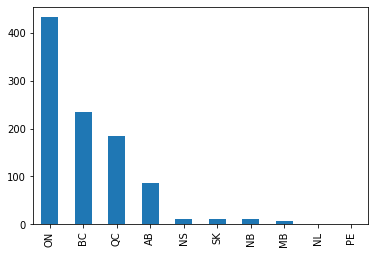

In [12]:
df["province"].value_counts().plot(kind="bar")

In [16]:
df.to_excel("/users/mbajaj/indeed_data.xlsx")